In [10]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
    path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)

In [11]:
import numpy as np
import time

from pprint import pprint
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import build_default_calc, build_default_source
from lenstronomy.Util import data_util
from lenstronomy.SimulationAPI.ObservationConfig.Roman import Roman

from package.helpers import test_physical_lens
from package.pandeia import pandeia_input
from package.plots import diagnostic_plot, plot

plt.style.use(f'{repo_path}/package/mplstyle/science.mplstyle')

In [12]:
figure_dir = os.path.join(repo_path, 'figures', 'diagnostics', 'pixel_density_test')
array_dir = os.path.join(repo_path, 'output', 'arrays', 'diagnostics', 'pixel_density_test')

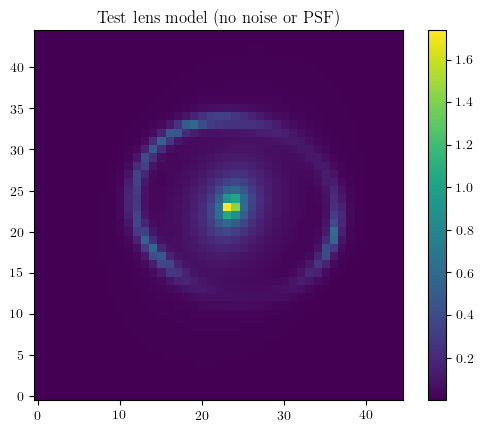

In [13]:
physical_lens = test_physical_lens.TestPhysicalLens()

model = physical_lens.get_array(num_pix=45)

plot.plot(filepath=None,
          title='Test lens model (no noise or PSF)',
          array=model,
          colorbar=True)

In [14]:
oversample_factor = 3
oversample_grid = np.zeros((model.shape[0] * oversample_factor, model.shape[1] * oversample_factor))
flattened_model = model.flatten()

In [15]:
print(oversample_grid.shape)
print(flattened_model.shape)

(135, 135)
(2025,)


In [16]:
k = 0

for i, row in enumerate(oversample_grid):
    for j, _ in enumerate(row):
        if not (i % oversample_factor) - 1 == 0:
            continue
        if (j % oversample_factor) - 1 == 0:
            oversample_grid[i][j] = flattened_model[k]
            k += 1

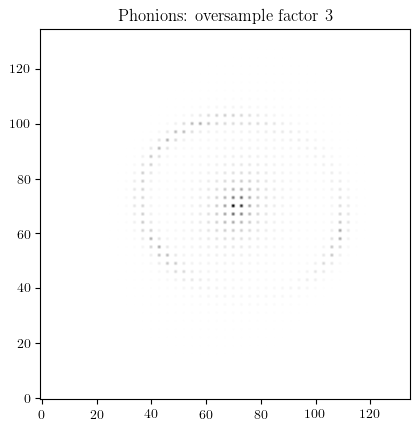

In [17]:
plt.imshow(oversample_grid, cmap='binary')
plt.title(f'Phonions: oversample factor {oversample_factor}')
plt.show()